# Introduction
In this notebook we will cover the following topics:
- Trees, such as decision trees.
- Naïve bayes

# Decision Trees
Decision Trees are a non-parametric supervised learning method used for classification and regression. A decision tree can learn to predict the target value by learning rules. Those rules are based on the given features. For instance, if you want to determine if someone has a sever risk of getting diabetes you could do the following: `if blood glucose level is high then YES, else NO`. The tree divides the features into smaller nodes.

Growing a tree involves making crucial decisions about selecting features and determining the conditions for splitting, while also understanding when to halt the growth. Since a tree tends to grow in an uncontrolled manner, pruning is essential to ensure its aesthetic appeal and efficiency.

one of the common techniques used here is 

### **Recursive Binary Splitting**:

During this procedure, all features are thoroughly examined, and various split points are experimented with by evaluating a cost function. The split that yields the optimal cost (or the lowest cost) is chosen as the final decision.

According to this procedure, during the first split (or at the root), all attributes/features are taken into consideration, and the training data is divided into groups based on this split. To determine the accuracy of each split, a function is utilized, evaluating the cost incurred by each. The split that results in the lowest cost is selected. This algorithm is recursive, allowing the groups formed to be further sub-divided using the same strategy. As a result of this approach, the algorithm is also referred to as the greedy algorithm, owing to its strong inclination to minimize costs. Consequently, the root node becomes the optimal predictor/classifier.

### **Homogenous Branches**:

Homogeneous branches refer to the situation in which the data points within a particular branch of a decision tree exhibit a high degree of similarity with respect to the target variable (class label in classification or continuous value in regression). In other words, a branch is considered homogeneous when the majority (or ideally, all) of the data points within that branch belong to the same class or have similar target values.

In the context of decision trees, creating homogeneous branches is a desirable goal because it simplifies the decision-making process. When a branch is highly homogeneous, it means that the majority of the data points in that branch share common characteristics or responses, making it easier to make predictions for new, unseen data points that fall into the same branch.

*Classification Example*:

Suppose we have a decision tree for classifying animals as "mammals" or "birds" based on features like whether they lay eggs, have fur, or produce milk. If a particular branch in the decision tree contains only animals that lay eggs and have feathers, it becomes a homogeneous branch, consisting exclusively of birds.

*Regression Example*:

Let's consider a decision tree for predicting the price of a house based on features like its size, number of rooms, and location. If a branch in the tree represents houses with similar sizes, similar numbers of rooms, and located in the same area, it becomes a homogeneous branch, meaning that the houses in that branch tend to have similar predicted prices.

Creating homogeneous branches is crucial because it ensures that the decision tree captures patterns and relationships within the data, leading to more accurate predictions. The goal of the tree-building algorithm is to find the best splits at each node such that it creates branches with high homogeneity, allowing for confident and reliable predictions for new data points that fall into those branches.

### **Cost of a split**:

Lets take a closer look at cost functions used for classification and regression. In both cases the cost functions try to find most homogeneous branches, or branches having groups with similar responses. This makes sense we can be more sure that a test data input will follow a certain path.

Regarding regression, one of the functions that can be used is Sum of Squared Errors (SSE):

$$
SSE = \sum{(y - prediction)^2}\
$$

Consider a scenario where we aim to predict house prices using a decision tree. The decision tree initiates the splitting process by evaluating each feature in the training data. For a specific group, the mean of the target variable (house prices) for the training data inputs within that group is used as the prediction. The mentioned procedure is applied to all data points, and the cost is computed for each potential split. Subsequently, the split with the lowest cost is selected as the optimal decision, guiding the tree's growth. one can use other functions here such as cost function based on  standard deviation.

With respect to classification, one can use Gini Score:

$$
Gini = \sum{(pk . (1 - pk)}\
$$

The Gini score provides insight into the quality of a split by assessing the level of mixing among response classes within the resulting groups. In this context, pk​ represents the proportion of inputs belonging to the same class within a specific group. When a group contains inputs exclusively from a single class, achieving perfect class purity, pk is either 1 or 0, resulting in a Gini score of 0. Conversely, a node with an even split (50-50) of classes within a group exhibits the worst purity, resulting in pk=0.5 and G=0.5, particularly in the case of binary classification.

### **When to stop splitting?**:

The question of when to stop growing a decision tree is crucial to prevent overfitting, especially when dealing with a large set of features that can lead to an extensive number of splits and result in a complex, oversized tree. To address this issue, several stopping criteria can be employed.

1. **min_samples_leaf**: One common approach is to set a minimum number of training inputs to be included in each leaf node. For instance, we can stipulate that a minimum of 10 animals must be present in a leaf node for a decision to be reached, and any leaf with fewer than 10 animals is disregarded.

2. **max_depth**: Another method involves setting a maximum depth for the model. The maximum depth refers to the length of the longest path from the root to a leaf node. By limiting the depth, the tree's growth is controlled, preventing it from becoming overly intricate.

3. **min_samples_leaf**: Instead of setting a minimum number of samples per leaf, you can specify a minimum number of samples required to make a split at a node. If the number of samples at a node is less than this threshold, the node will not be split further.

4. **min_weight_fraction_leaf**:  It is similar to min_samples_leaf, but instead of considering the number of samples, it considers the sum of sample weights.

5. **min_impurity_decrease**: Specify a threshold for the minimum decrease in impurity (e.g., Gini impurity or Information Gain) required to make a split. If the impurity decrease is below this threshold, the split is not considered.

6. **Maximum Features**: Limit the number of features that can be considered for each split. This is useful when dealing with high-dimensional datasets, as it restricts the search space for potential splits.

7. **Pruning**: Build the full tree first and then prune the tree by removing branches that do not significantly improve performance on a validation set. Pruning helps to simplify the tree and avoid overfitting. Pruning in decision trees can be initiated from either the root or the leaves. One straightforward pruning approach commences at the leaves and removes each node containing the most frequent class, as long as this removal does not adversely affect the accuracy of the model. This method is commonly referred to as reduced error pruning. On the other hand, more advanced pruning techniques can be employed, such as cost complexity pruning, which leverages a learning parameter (alpha) to determine whether nodes can be pruned based on the size of the sub-tree. This technique is also known as weakest link pruning.

8. **Ensemble Techniques**: A group of techniques utilize more than one desicion trees to build a model that can reduce the effect of overfitting and increase the accuracy and generality of the model. Some of the most popular techniques in this category are Random Forest and Gradient Boosting.

Applying appropriate stopping criteria ensures that the decision tree achieves a balance between complexity and generalization, enhancing its ability to make accurate predictions on new, unseen data.

### **Class Imbalance**

Balancing the dataset in the context of decision tree learning means adjusting the class distribution of the training data to reduce the impact of class imbalances. Class imbalances occur when some classes are significantly more prevalent than others in the dataset, leading the decision tree learner to favor the dominant classes and potentially neglecting the minority classes.

1. **Resampling Techniques**: a. Oversampling: Increase the number of instances in the minority class by duplicating existing data points or generating synthetic samples. b. Undersampling: Decrease the number of instances in the majority class by randomly removing data points from the majority class.

2. **Synthetic Data Generation**: Techniques like Synthetic Minority Over-sampling Technique (SMOTE) create synthetic data points in the minority class, addressing the class imbalance.

3. **Class Weighting**: In decision tree algorithms, you can assign higher weights to the samples from the minority class during the training process. This allows the algorithm to pay more attention to the minority class during the learning phase.

4. **Ensemble Methods**: Ensemble methods like Random Forest and Gradient Boosting are naturally robust to class imbalances and can handle them more effectively than individual decision trees.

### **Advantages**:
- Simple to understand and to interpret. The tree can be visualized.
- Doesn't require much data preparation, regarding normalization, dummy variables etc.
- The cost of using the tree is logarithmic in the number of datapoints, thus it is rather quick.
- Possible to validate a model using tests.

### **Disadvantages**:
- Can create over-complex trees that do not generalize data well. Thus, overfitting is a big issue with trees, especially with high-dimensional data.
- Can be unstable, because small variations in data might result in completely different trees. That is why an `ensemble` is popular.
- Decision trees create biased trees if some classes dominate. Therefore, class-balancing is very important. This can be done using over- under-sampling and other techniques.

For classification, scikit-learn provides the `DecisionTreeClassifier`. This model can be used for:
- Binary classification
- Multi-class classification

The model can output:
- The actual prediction
- The probability of a prediction. There have been some issues whether it would really be the probability. Therefore, some calibration methods have been developed. However, this is too in-depth, but good to know that probability can be misleading.

To plot the decision tree function we can use the `plot_tree` function. This will give us insight into its decision rules. For an extensive tutorial, read the <a href="https://scikit-learn.org/stable/modules/tree.html#tree" target="_blank">user guide</a>.

For regression, scikit-learn provides the `DecisionTreeRegressor`.

### **Tips on practical use**:
- As decision trees tend to overfit with a large number of features, make sure to getting the right ratio of samples to features.
- Consider performing dimensionality reduction.
- Consider creating another model that doesn't overfit for feature selection purposes.
- Tune `max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, min_impurity_decrease`.

For further information one can use the following links:

<a href="https://en.wikipedia.org/wiki/Decision_tree_learning" target="_blank">wiki</a>, <a href="https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052" target="_blank">link</a>, <a href="https://www.youtube.com/watch?v=_L39rN6gz7Y" target="_blank">Youtube</a>, <a href="https://towardsdatascience.com/boosting-the-accuracy-of-your-machine-learning-models-f878d6a2d185" target="_blank">boosting</a> (not necessary for this assignment)


### **Boosting and Bagging (Desicion Trees)**:

#### **Bagging**:
The prediction accuracy of a decision tree can be low due to its vulnerability to variance. This indicates that if we randomly split the training data into two sets and construct decision trees for both parts, the outcomes might differ considerably. Ideally, we seek a result that exhibits low variance when applied repeatedly to various distinct datasets. In other words, we want a decision tree that demonstrates stability and consistent performance across different data samples. One of the techniques one can use to enhance the accuracy of a desicion tree is **Bootstrapping**. One of the bootsrapping technique is **Bagging** and its stages are as follows:

1. Create many (e.g. 100) random sub-samples of our dataset with replacement (meaning we can select the same value multiple times).

2. Learn(train) a decision tree on each sample.

3. Given new dataset, Calculate the prediction for each sub-sample.

4. Calculate the average of all of our collected predictions(also called bootstrap estimates) and use that as our estimated prediction for the data.

In this approach, trees are grown deep and are not pruned. Thus each individual tree has high variance, but low bias. Averaging these trees reduces the variance dramatically.

Bootstrapping is a robust statistical technique used to estimate a quantity from a data sample, such as a mean or a standard deviation. When applied to high-variance machine learning algorithms, like decision trees as demonstrated in the above example, it is referred to as Bagging (or bootstrap aggregating). Bagging involves creating multiple bootstrap samples (random subsets with replacement) from the original data and training separate decision trees on each sample. These trees are then combined through an averaging process (for regression tasks) or voting (for classification tasks), resulting in a more stable and accurate prediction model. Bagging helps mitigate the impact of high variance and improves the overall performance and generalization of the machine learning algorithm.

#### **Error Estimation**:
A convenient approach for estimating the test error of a bagged model, without resorting to cross-validation, is known as Out-of-Bag Error Estimation. During the bagging process, some observations remain unused to train specific trees, and these are referred to as the out-of-bag (OOB) observations. By leveraging these OOB observations, we can predict the response for each of them using the corresponding trees that did not involve them in their training. Subsequently, we can aggregate the predicted responses through averaging (for quantitative responses) or majority voting (for qualitative responses). This yields an overall OOB MSE (Mean Squared Error) or classification error rate.

The benefit of this OOB approach is that it provides an acceptable test error rate, as the predictions rely solely on the trees that were not trained using the specific observation in question. Hence, there is no need for cross-validation, making the process more efficient and less computationally demanding.

#### **Random Forests**:
When decision trees are constructed using bootstrapped samples (bagging) and utilize the strongest predictors/classifiers for splitting branches, it is likely that several trees will end up using the same strong predictor at various points in their structure.

This repetitiveness of strong predictors across multiple trees leads to correlated decisions among the ensemble. As a result, when the trees are combined to make predictions on new data points, they tend to produce similar outcomes. While this can enhance the accuracy of the model on the training data (reducing bias), it may lead to higher variance when applied to unseen data.

The variance here refers to the sensitivity of the model's predictions to the specific training data it was exposed to during the bootstrapping process. If the training data happened to capture some random fluctuations or noise, the correlated decisions made by multiple trees could amplify these fluctuations, resulting in less reliable predictions on new data. This is known as overfitting, where the model becomes too tailored to the training data and loses its ability to generalize well to unseen data.

To address this issue, ensemble techniques like Random Forests were introduced. Random Forests further randomize the feature selection process during tree building, which helps reduce the correlation between trees and, in turn, mitigates overfitting. This increased diversity in the ensemble tends to improve its generalization performance and reduces variance, resulting in a more robust and accurate model on unseen data.

The core idea of random forest is as follows. When splitting branches in a tree, a random sample of "m" predictors is selected as potential split candidates from the complete set of "p" predictors. However, only one predictor from the sampled set is used for the actual split at each node. This process is repeated at every split. Therefore, a new sample of "m" predictors is drawn for each split in the tree.

1. For classification a good default is: m = sqrt(p)

2. For regression a good default is: m = p/3

In genereal, tuning the value of "m" is an essential step in optimizing the Random Forest model. Different values of "m" can be tried and evaluated using cross-validation. Cross-validation helps determine the optimal value of "m" that leads to the best trade-off between bias and variance, resulting in a well-performing model on new and unseen data.

Thus, on average, (p — m) / p of the splits will not even consider the strong predictor. This is known as decorrelating the trees, as we fix the issue of each tree using same strong predictor. If m = p then random forests is equal to bagging.

#### **Feature Importance**:

One problem with computing fully grown trees is that we cannot easily interpret the results. And it is no longer clear which variables are important to the relationship. Calculating drop in the error function for a variable at each split point gives us an idea of feature importance. It means that we record the total amount that the error is decreased due to splits over a given predictor, averaged over all bagged trees. A large value then indicates an important predictor. In regression problems this may be the drop in residual sum of squares and in classification this might be the Gini score.

#### **Boosting**:
The prediction accuracy of decision trees can be further improved by using Boosting algorithms. The basic idea behind boosting is converting many weak learners to form a single strong learner. 

A weak learner is a classifier that consistently performs better than chance when attempting to label the data, regardless of the distribution in the training data. Outperforming chance indicates that the error rate is consistently lower than 1/2. Consequently, the learner algorithm is able to acquire some knowledge, but it lacks the ability to be highly accurate in learning the complex relationships between inputs and targets. In essence, a weak learner is not proficient in capturing intricate patterns on its own. Instead, it relies on ensembling methods or combination with other weak learners to become more powerful as a group rather than individually.

We start finding weak learners in the dataset by making some distributions and forming small decision trees from them. The size of the tree is tuned using number of splits it has. Often 1 works well, where each tree consists of a single split. Such trees are known as Decision Stumps.

Another parameter boosting takes is the number of iterations or number of trees in this case. Additionally, it assigns weights to the inputs based on whether they were correctly predicted/classified or not. Lets look at the algorithm.

First, the process begins by initializing the inputs with equal weights. The initial base learning algorithm employed is typically a decision stump, constituting a weak learner. In this initial stage, the algorithm fits a subsample of the data and makes predictions for the entire dataset.

Next, the iterative process is carried out until the maximum number of trees is reached:

The algorithm updates the weights of the inputs based on the previous run, assigning higher weights to inputs that were wrongly predicted or classified.

Another decision stump is then constructed, taking into account the misclassified inputs (those with higher weights), and it is fitted to a subsample of the data.

Finally, all inputs are predicted or classified using this newly formed decision stump.

After completing these iterations, the weak rules obtained are combined to create a single strong rule. This composite rule will be utilized as the final model for prediction and classification tasks. The combination of multiple weak learners contributes to the creation of a more powerful and accurate overall model.

In the regression setting, the boosting technique adjusts the weights of inputs based on the prediction error, typically calculated using least squares. This adjustment leads the subsequent learners to focus more on inputs that have a larger prediction error.

This particular boosting approach is known as Adaptive Boosting or AdaBoost. Similar to decision trees, the boosting approach also aims to minimize a loss function. In the case of AdaBoost, the exponential loss function is utilized to guide the learning process.

Another popular version of boosting is the Gradient Boosting Algorithm. While the basic concept remains consistent with traditional boosting, there is a fundamental difference in the approach. Instead of adjusting weights, the model is fit on the residuals, which represent the differences between the predictions and the original outcomes.

In Adaboost, the learning process involves iteratively refining sample weights to focus on misclassified inputs. On the other hand, Gradient Boosting utilizes an internal regression model that is trained iteratively on the residuals. This means that the new weak learners are formed with a specific emphasis on the inputs that exhibit high residuals, essentially concentrating on the areas where the previous model struggled to make accurate predictions.

Both algorithms, Boosting and Gradient Boosting, incorporate a tuning parameter known as lambda or shrinkage, which plays a critical role in slowing down the learning processes. This parameter enables the algorithms to employ more diverse and differently shaped trees to target the residuals effectively. Another name for this parameter is the learning rate, as it regulates the impact of each tree on the overall model.

Unlike traditional decision tree fitting, Boosting and Gradient Boosting refrain from bootstrapping. Instead, each tree is fitted on a modified version of the original data. In these approaches, the emphasis is placed on adjusting the weights of data points based on their performance in previous iterations. This allows subsequent trees to concentrate on the misclassified or high residual data points, leading to a more accurate model.

By avoiding the fitting of a single large decision tree, which can easily lead to overfitting and a rigid fit to the data, Boosting and Gradient Boosting take a more cautious approach. Instead, they employ an ensemble of weak learners that gradually learn and improve the model's performance, resulting in a more robust and reliable learning process.

There are a number of reasons that Desicion trees are the best choice for boosting based on the <a href="https://towardsdatascience.com/boosting-the-accuracy-of-your-machine-learning-models-f878d6a2d185" target="_blank">link</a>:

1. Decision trees are non-linear. Boosting with linear models simply doesn’t work well.

2. The weak learner needs to be consistently better than random guessing. You don’t normally need to do any parameter tuning to a decision tree to get that behavior.

3. Decision trees are reasonably fast to train.

4. By changing the depth you have a simple and easy control over the bias/variance trade off, knowing that boosting can reduce bias but also significantly reduces variance.

The above information about Boosting and Bagging is just a summary and paraphrazed informaion of <a href="https://towardsdatascience.com/boosting-the-accuracy-of-your-machine-learning-models-f878d6a2d185" target="_blank">link</a>. The reason is that I found the language of this web page tough to understand, conseuently, I make it a little bit easier to realize.


# Naive bayes
Naive bayes are methods based on Bayes' theorem with the assumption of conditional independence between every pair of features given the value of a class variable.

Advantages:
- Tends to work really well in real-world situations.
- Can be very fast.
- Requires a small amount of training data.
- If the dataset does not fit into memory, some types can use the `partial_fit` method.

Disadvantages:
- Although it is a decent classifier, it is known as a bad estimator. Therefore the probabilities from `predict_proba` are not used normally.

Types of classifiers offered by scikit-learn:
- `GaussianNB` uses the Gaussian Naive Bayes algorithm for classification. It assumes that the likelihood of the features is Gaussian.
- `MultinomialNB` is used for multinomially distributed data.
- `ComplementNB` implements the complement naive Bayes algorithm. It is an adaptation of the mulltinomial naive bayes and is suitable for imbalanced data sets.
- `BernoulliNB` assumes that data is distributed according to multivariate Bernoulli distributions. Thus, it requires binary-valued variables.
- `CategoricalNB` implements naive Bayes for categorically distributed data. It assumes that each feature has its own categorical distribution.

For an extensive description, make sure to read the <a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_blank">docs</a>.

**Main takeaway**:
- Every dataset has its own characteristic and different types of models have their own unique aspects that may work best with a given dataset.

# Example of understanding decision trees
In this example I add all the material that exist in the <a href="https://scikit-learn.org/stable/modules/tree.html#tree" target="_blank">user guide</a>.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import graphviz 
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split


In [2]:
iris = load_iris()
X, y = iris.data, iris.target

# this is for demonstration, always split for generalizability.
dt = tree.DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

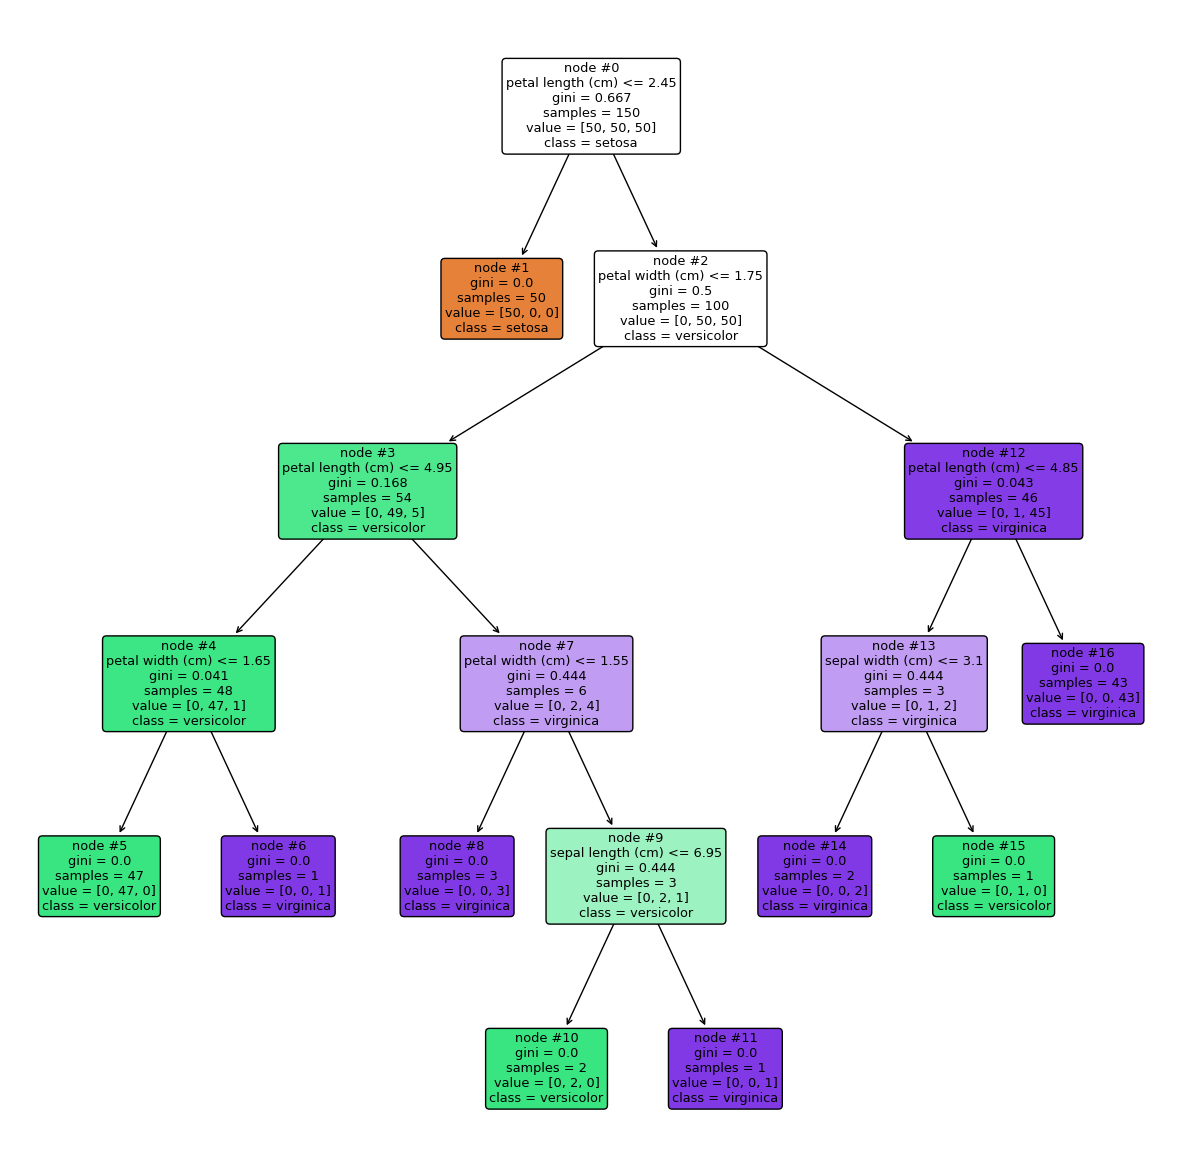

In [3]:
plt.figure(figsize=(15, 15))
tree.plot_tree(
    dt, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    node_ids=True 
)
plt.show()

Also, I use graphviz package to plot this tree. it is a little bit tricky to work with graphviz, but it worth it. Be sure to install graphviz both on Python and your windows, then add the path  C:\Program Files\Graphviz\bin to your system's path if you are using Window of course. For more information please have a look at the following <a href="https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft" target="_blank">link</a>. on this Stackflow link you can find different instructions for different operator systems to install and use graphviz on your computer.

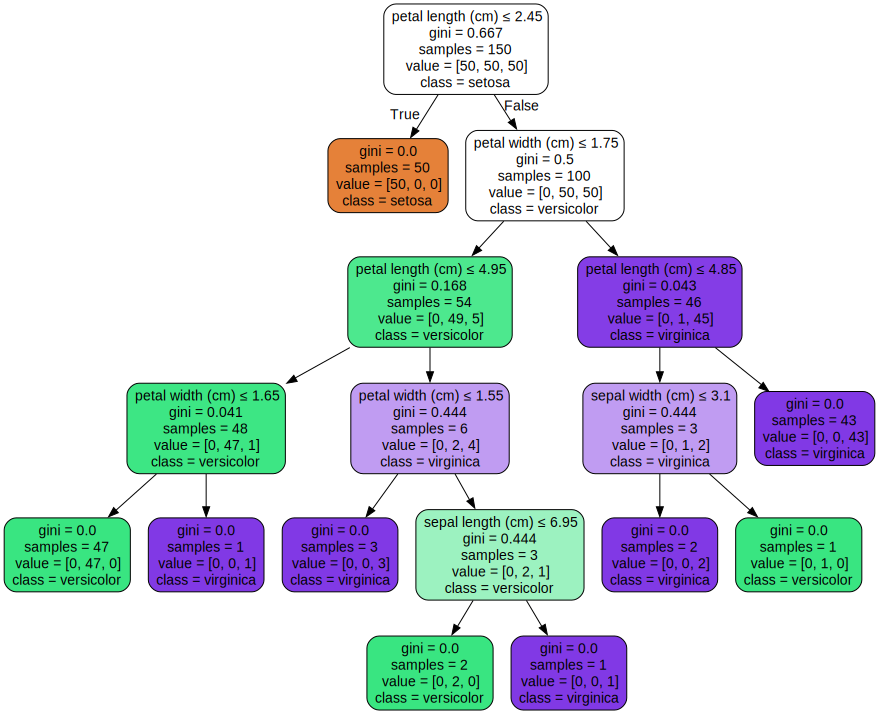

In [4]:

dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("iris")

dot_data = tree.export_graphviz(dt, out_file=None, 
                        feature_names=iris.feature_names,  
                        class_names=iris.target_names,  
                        filled=True, rounded=True,  
                        special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Also, one can plot the decision surface of a decision tree trained on pairs of features of the iris dataset. <a href="https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html" target="_blank">link</a>

C:\Users\Parsian computer\AppData\Local\Temp\ipykernel_8420\2430203240.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[row_num, column_num].scatter(
C:\Users\Parsian computer\AppData\Local\Temp\ipykernel_8420\2430203240.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[row_num, column_num].scatter(
C:\Users\Parsian computer\AppData\Local\Temp\ipykernel_8420\2430203240.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[row_num, column_num].scatter(
C:\Users\Parsian computer\AppData\Local\Temp\ipykernel_8420\2430203240.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[row_num, column_num].scatter(
C:\Users\Parsian computer\AppData\Local\Temp\ipykernel_8420\2430203240.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[row_n

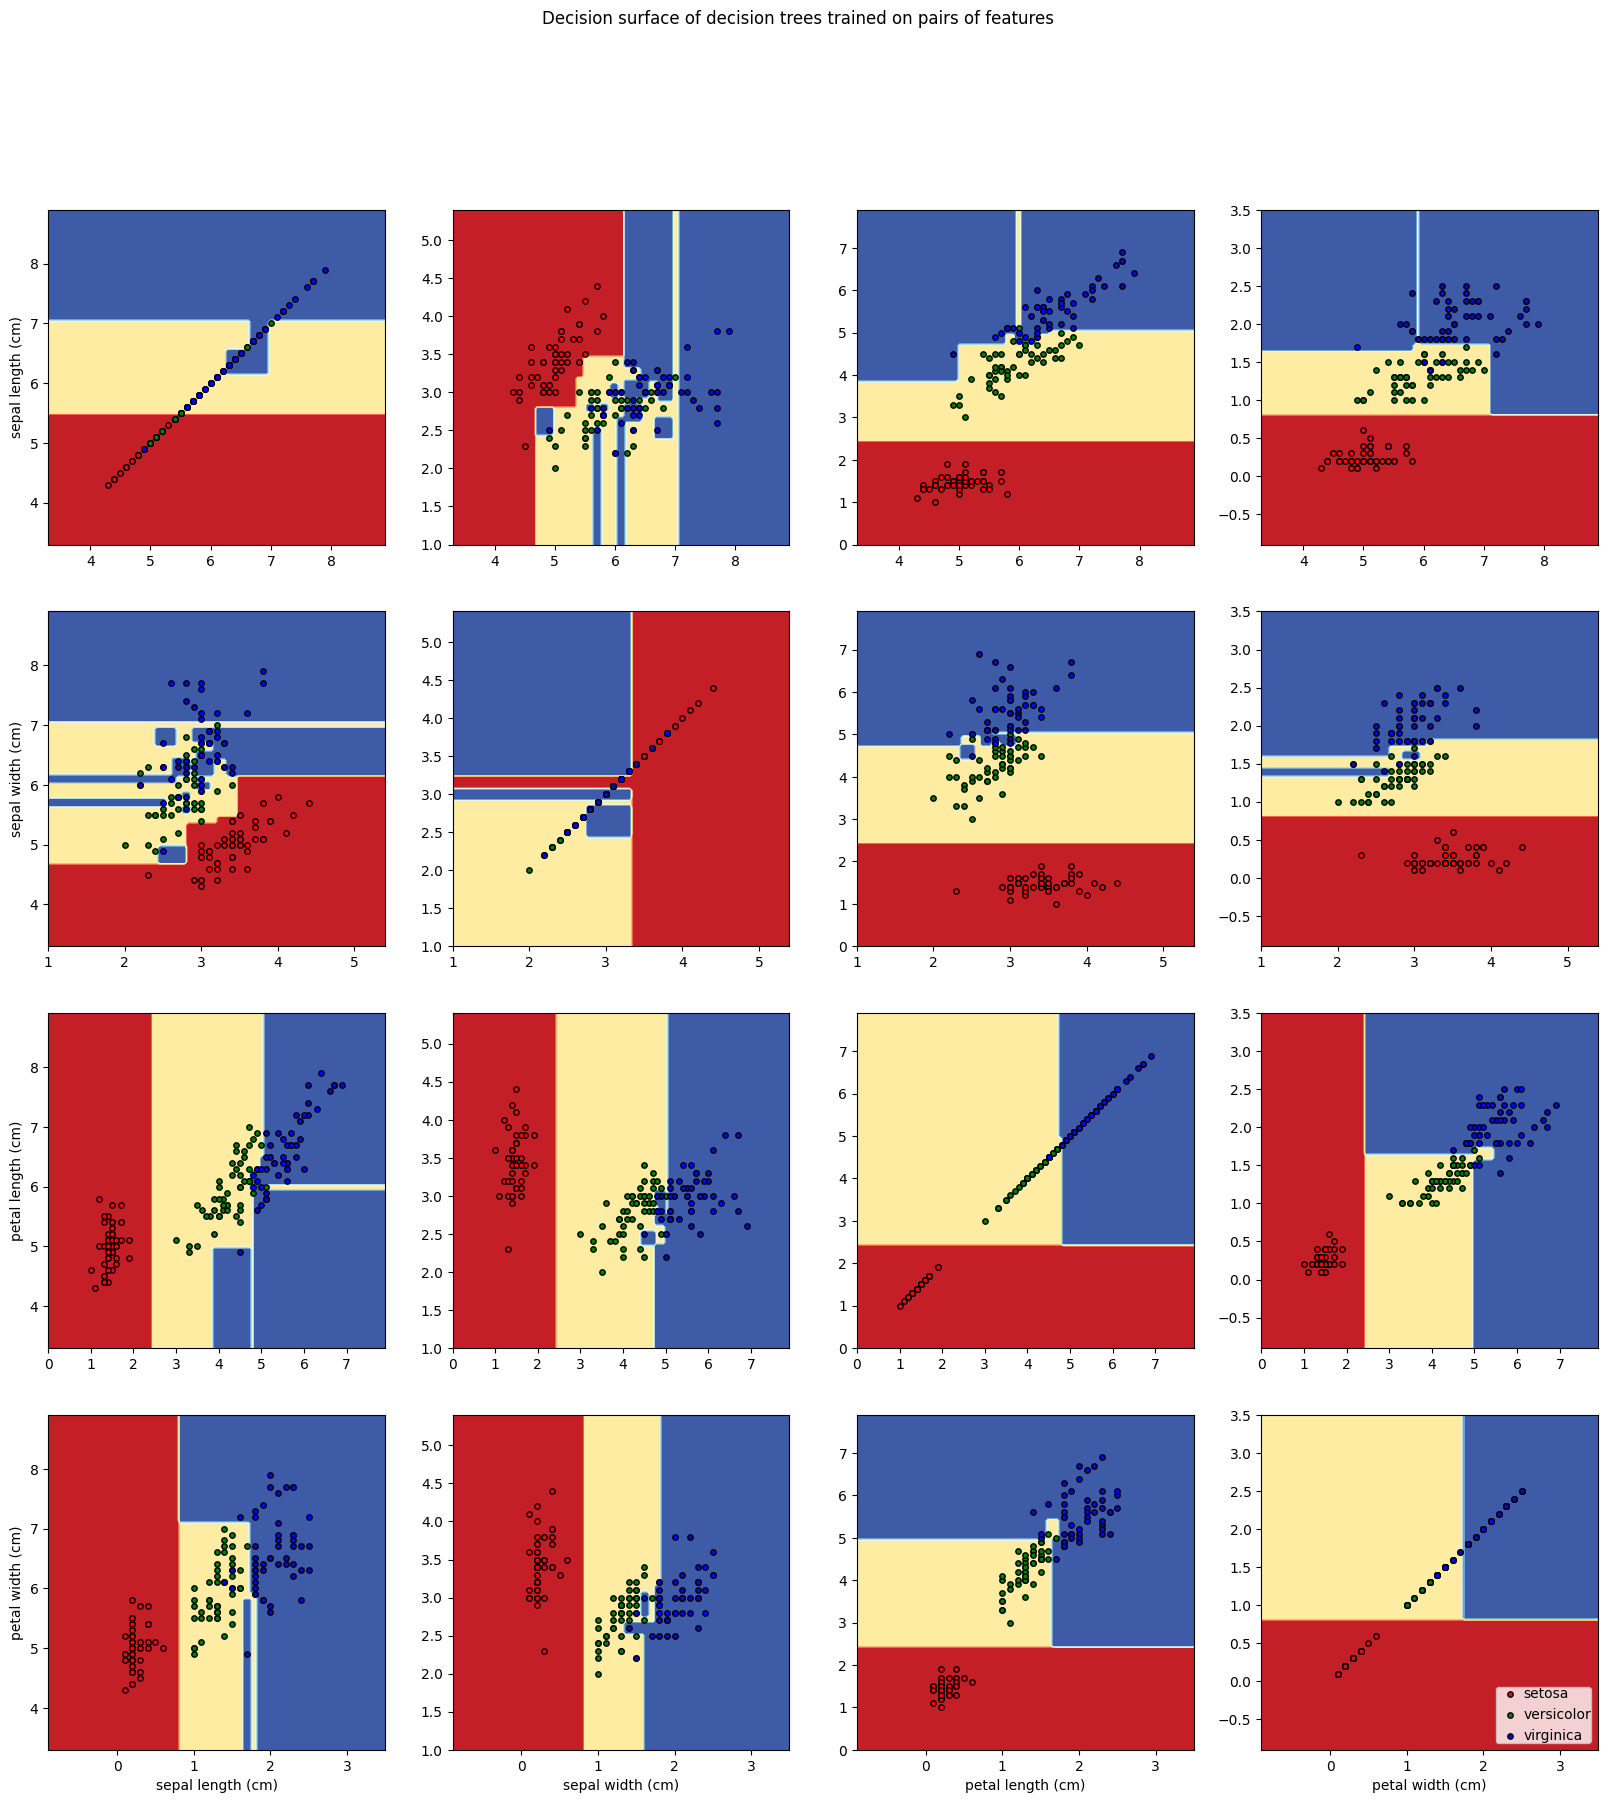

In [59]:
def decision_surface_plot(data, num_classes, colors, xlabel, ylabel, scatter_label):
    n_classes = num_classes
    plot_colors = colors

    # Sketch the plot
    fig, axes = plt.subplots(data.shape[1], data.shape[1], figsize= (20,20))

    # Flatten the axes
    if data.shape[1] > 1:
        # flatten for easier manipulation
        axes.flatten()
    else:
        axes = [axes]

    # loop over all the features/classifiers
    for number in range(data.shape[1]**2):
        row_num = number // 4
        column_num = number % 4

        X = iris.data[:, [row_num, column_num]]
        y = iris.target

        # Train
        clf = tree.DecisionTreeClassifier().fit(X, y)


        # Plot the decision boundary
        decision_boundary_plot = DecisionBoundaryDisplay.from_estimator(
                                                    clf,
                                                    X,
                                                    cmap=plt.cm.RdYlBu,
                                                    response_method="predict",
                                                    ax=axes[row_num, column_num],
                                                    )
        
        # sketch the labels
        if column_num == 0:
            axes[row_num, column_num].set_ylabel(ylabel[row_num])

        if row_num >= data.shape[1]-1:
            axes[row_num, column_num].set_xlabel(xlabel[column_num])
        
        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
                    idx = np.where(y == i)
                    axes[row_num, column_num].scatter(
                                            X[idx, 0],
                                            X[idx, 1],
                                            c=color,
                                            label=scatter_label[i],
                                            cmap=plt.cm.RdYlBu,
                                            edgecolor="black",
                                            s=15,
                                            )

    # add title and legend
    plt.suptitle("Decision surface of decision trees trained on pairs of features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    _ = plt.axis("tight")
    plt.show()

data = iris.data
num_classes = 3
colors = 'rgb'
xlabel = iris.feature_names
ylabel = iris.feature_names
scatter_label = iris.target_names
decision_surface_plot(data, num_classes, colors, xlabel, ylabel, scatter_label)

We can see that if the petal width is smaller than 1.75 it will look if the class has a petal length smaller than 4.95 or smaller than 4.85. It will then create new nodes and determine to which class the features belong. 

# Comparing decisions

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_moons, make_circles
from sklearn.inspection import DecisionBoundaryDisplay 

from matplotlib.colors import ListedColormap

In [ ]:
datasets = [make_moons(), make_circles()]
names = ['Decision Tree', 'Naive Bayes']
classifiers = [tree.DecisionTreeClassifier(), GaussianNB()]

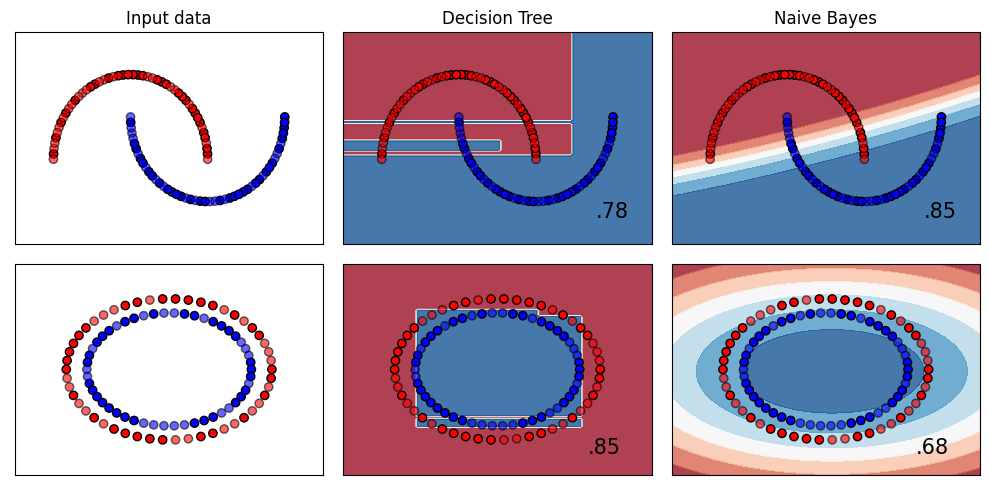

In [ ]:
figure = plt.figure(figsize=(10, 5))

i = 1

# iterate over datasets
for ds_count, ds in enumerate(datasets):
    X, y = ds
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0
    )
    
    # determining min point and max point and add margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # plot dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # plot original
    if ds_count == 0:
        ax.set_title('Input data')
        
    # plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # plot testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        # make pipeline to make it easier
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )
        
        # plot training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # plot testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_count == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
        
plt.tight_layout()
plt.show()

**Conclusion**:
- Classifiers can have unique assumptions that are great for certain datasets and less great for others.